<a href="https://colab.research.google.com/github/elhamod/AML_GANs/blob/master/Hands-on/03-dimensionality-reduction/Dimensionality_Reduction_Hands_on_unsolved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Course: BA820 - Unsupervised and Unstructured ML**

**Notebook created by: Mohannad Elhamod**

#Food Nutrients Analysis

In this notebook, we will try to analyze the nutrients found in the [food in Google's cafeterias](https://huggingface.co/datasets/mmathys/food-nutrients).

We will see how to apply dimensionality reduction, and how that could help with downstream tasks, such as classification and clustering.

## Load the data

Let's load the datasets and see what information it provides. (this may take a minute or two).

In [7]:
import pandas as pd




url = "https://drive.google.com/uc?export=download&id=1dwtqk2rlcouemYn7W2HES3aa_322dXFg"


# Read the CSV file into a DataFrame and make some edits.
df = pd.read_csv(url, index_col=0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3260 entries, 0 to 3259
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ingredients     3260 non-null   object 
 1   total_calories  3260 non-null   float64
 2   total_mass      3260 non-null   float64
 3   total_fat       3260 non-null   float64
 4   total_carb      3260 non-null   float64
 5   total_protein   3260 non-null   float64
dtypes: float64(5), object(1)
memory usage: 178.3+ KB


##EDA

We have some information on the ingrediants, and some nutrition values, such as protien, fat, etc.

Let's remove the features we don't care about and do some preprocessing.

In [9]:
# A separate dataframe just with the numeric values.
df_numeric = df.drop("ingredients", axis=1)

In [10]:
df_numeric

total_calories  total_mass  total_fat  total_carb  total_protein
0          41.399998        36.0   3.852000    2.268000       0.288000
1           6.440000        23.0   0.092000    1.219000       0.506000
2          71.299995        62.0   6.634000    3.906000       0.496000
3          27.520000        64.0   0.192000    5.760000       2.176000
4           4.480000        28.0   0.056000    0.952000       0.196000
...              ...         ...        ...         ...            ...
3255       55.800003       268.0   0.692000   10.969999       4.532000
3256       93.400002       348.0   0.852000   19.770000       7.172000
3257      443.199982       560.0   8.483999   19.770000      72.892006
3258      743.760010       594.0  42.484001   19.770000      72.891998
3259      751.679993       603.0  42.484001   21.300001      72.937004

[3260 rows x 5 columns]

Let's see how these dimensions interact.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

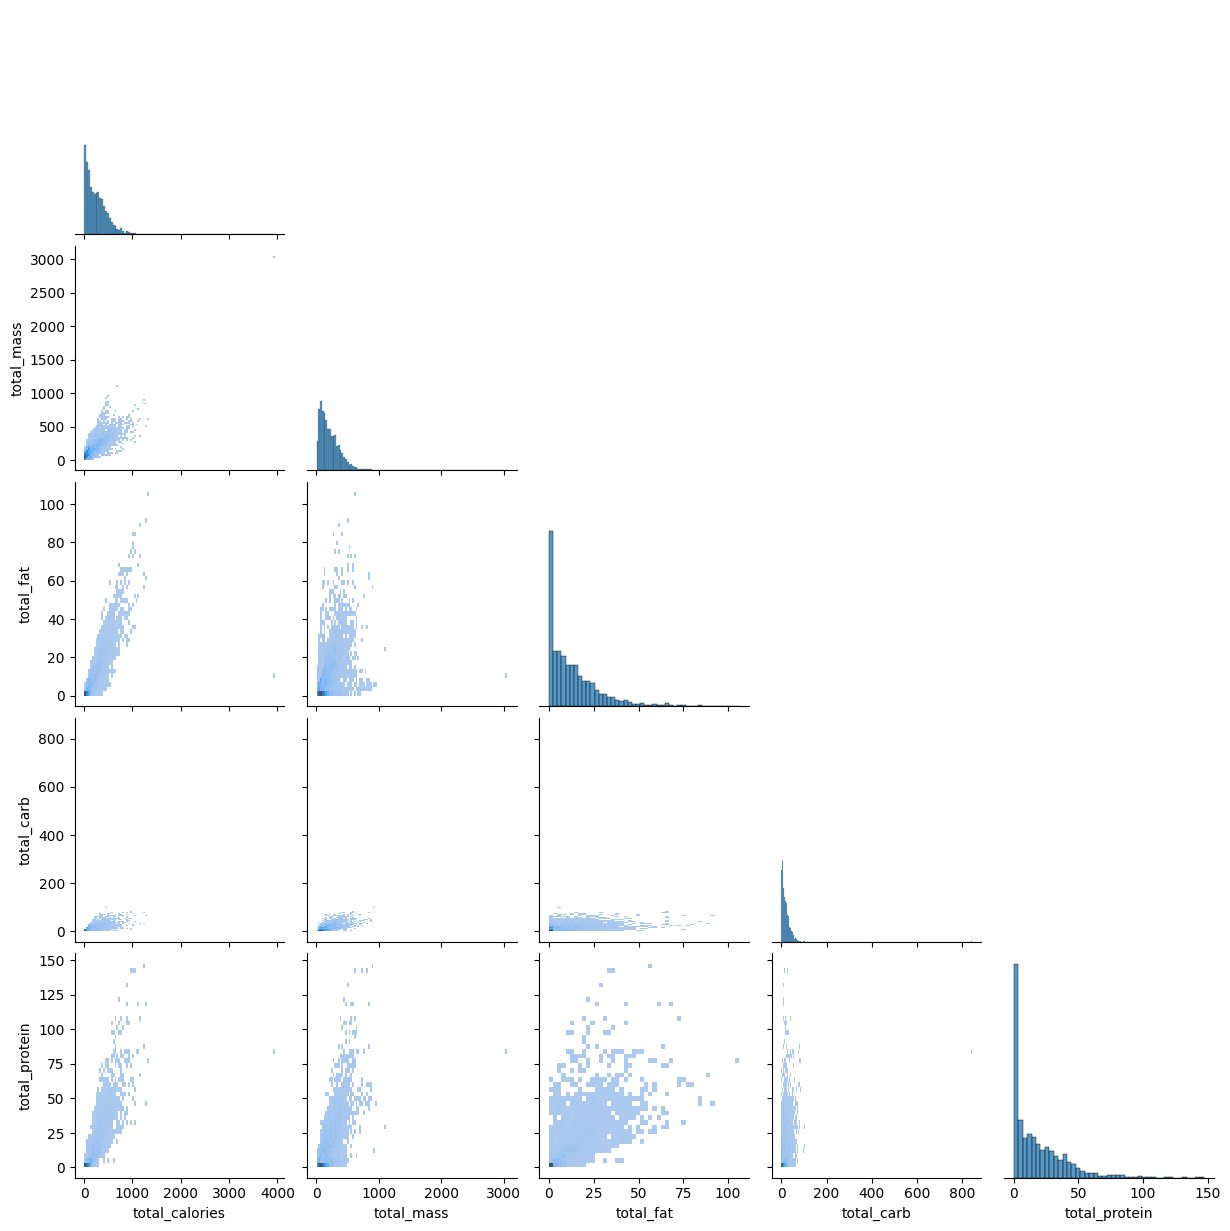

In [11]:
import seaborn as sns

sns.pairplot(df, kind="hist", corner=True, palette="Set2")

<Axes: >

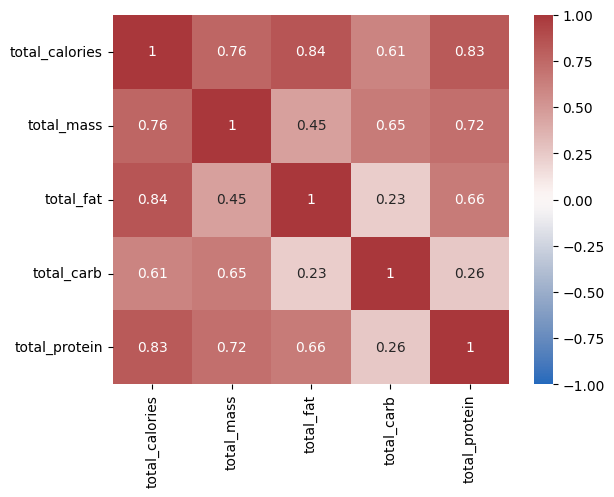

In [12]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="vlag" , vmin=-1, vmax=1)

## Dimentionality Reduction with PCA

Let's start with PCA, assuming features may align linearly.

First we need to normalize the data.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
normalized_data = ###
normalized_data

Then, we perform PCA.

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Create the model
model = ###

#fit the data
model ###

# transform the data
transformed_data = ###
transformed_data_df =  ### make dataframe

# Rename the columns
transformed_data_df.columns = [f"PC{i+1}" for i in range(df_numeric.shape[1])]

transformed_data_df

Let's take a look at how the data varies along each PC.

In [ ]:
model. ### variance?

In [ ]:
transformed_data_df.describe()

Let's look at the PCA components.

In [ ]:
components_df = ###

# Rename the columns
components_df.columns = df_numeric.columns

# Rename the rows
components_df.index = [f"PC{i+1}" for i in range(components_df.shape[0])]

components_df

**Question:** What is the magnitude (i.e., length) of each principal component?

In [ ]:
sns.heatmap(      , annot=True, cmap="vlag" , vmin=-1, vmax=1)

###Feature Importance

Let's look at the explained variance of the model and print the scree plot using [`psynlig`](https://psynlig.readthedocs.io/en/latest/).

In [ ]:
!pip install psynlig

In [ ]:
from matplotlib import pyplot as plt
from psynlig import (
    pca_explained_variance,
    pca_explained_variance_bar,
)

_, ax = ### explained variance cumulative

# Let's add a line at an explained variance of 90%
ax.axhline(y=    , color='r', linestyle='--', linewidth=2)

plt.show()

### explained variance bars. (scree)

plt.show()

### Computing the Loadings

Let's plot the scaled version of these components by scaling each of the components in proportion to their standard deviations (i.e., square root of `model.explained_variance_`). This is called the **loadings**.

In [ ]:
import numpy as np
loadings = ###

loadings_df = pd.DataFrame(loadings)
loadings_df

**Question:** If I move by 1 step along PC1, how many calories do I gain or lose?

Let's overlay the PCA components on top of the original features. We will use [`yellowbricks`](https://www.scikit-yb.org/en/latest/).

In [ ]:
from yellowbrick.features import PCA as PCA_visualizer

visualizer = ### visualize the relationship between features and PCs

visualizer. ###
visualizer.show()

We could also use [`psynlig`](https://psynlig.readthedocs.io/en/latest/)

In [ ]:
from psynlig import pca_2d_scores

loading_settings = {
    'adjust_text': True,
    'add_text': True,
}

pca_2d_scores(
    model,
    transformed_data,
    xvars=df_numeric.columns,
    select_components={(1, 2)},
    loading_settings=loading_settings,
    s=200,
    alpha=.8,
    cmap_class='Dark2',
)



plt.show()

Using `plotly` may help us with a more detailed investigation.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# add ingredients column for visualization
transformed_data_with_ingredients_df = pd.concat([transformed_data_df, df["ingredients"]], axis=1)

# Create a 3D scatter plot
fig = px.scatter_3d( #scatter_3d scatter
    transformed_data_with_ingredients_df,
    x="PC1",  # First principal component
    y="PC2",  # Second principal component
    z="PC3",  # Third principal component
    hover_name="ingredients",
)

fig.update_traces(
    marker=dict(
        size=2,  # Smaller marker size
        opacity=0.3  # Transparency (alpha)
    )
)


# Add an arrow for each original dimensions
for i, feature in enumerate(loadings_df.columns):
    fig.add_trace(
        go.Scatter3d(
            x=[0, loadings_df.loc["PC1", feature]],
            y=[0, loadings_df.loc["PC2", feature]],
            z=[0, loadings_df.loc["PC3", feature]],
            mode="lines",
            line=dict(color="red", width=3),
            showlegend=False,
        )
    )
    fig.add_trace(
        go.Scatter3d(
            x=[loadings_df.loc["PC1", feature]],
            y=[loadings_df.loc["PC2", feature]],
            z=[loadings_df.loc["PC3", feature]],
            mode="text",
            showlegend=False,
            text=[f"<b>{feature}</b>"],  # Bold text for better readability
            textfont=dict(size=12, color="red"),  # Match text color to the line
            textposition="middle right",  # Position the text more naturally
        )
    )

# Set axes ranges for easier display (removing outlier from display)
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-5, 10]),  # X-axis range
        yaxis=dict(range=[-5, 5]),   # Y-axis range
        zaxis=dict(range=[-2, 4])    # Z-axis range
    )
)

# Show the plot
fig.show()

## Clustering with and without PCA

###Outlier Removal

Let's remove the outliers first. That may help us get a better clustering. One way to do that is to find points with high reconstruction error.

In [ ]:
from sklearn.metrics import mean_squared_error

reconstructed_data = ###

# Calculate reconstruction error (MSE)
reconstruction_errors = mean_squared_error( , , multioutput='raw_values') ### Remember to transpose.

Only keep indices that are within 3 standard deviation of error.

In [ ]:
# Compute mean and standard deviation of the errors
mean_error = ####
std_error = ####

# Filter indices within 3 standard deviations
valid_indices = np.where() ##[0]

In [ ]:
valid_indices.shape

###Clustering in Original Space

Let's compare clustering results with and without PCA

First, let's do the original data frame.

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(
    kmeans, k=(2,10), metric='distortion', timings=False #metric='silhouette' metric='distortion'
)

visualizer.fit(normalized_data[valid_indices, :])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans = ####

visualizer = ###

visualizer        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Let's plot the clusters.

In [ ]:
df_original_withlabels = df.iloc[valid_indices]
df_original_withlabels["cluster_labels"] = kmeans.labels_

import plotly.express as px
fig = px.scatter_3d(df_original_withlabels, x='total_protein', y='total_carb', z='total_fat', color='cluster_labels', hover_name="ingredients",
                    opacity=0.5, color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_traces(marker=dict(size=3))  # Adjust the size to make dots smaller
fig.show()

###Clustering in a PCA-Low Dimensional Space

Let's now cluster with 1, 2, or 3 major PC components.

In [ ]:
low_dimensional_df = transformed_data_df[["PC1"]]

In [ ]:
kmeans = KMeans()
visualizer = KElbowVisualizer(
    kmeans, k=(2,10), metric='distortion', timings=False #metric='silhouette' metric='distortion'
)

visualizer.fit(low_dimensional_df.iloc[valid_indices])        # Fit the data to the visualizer
visualizer.show()

In [ ]:
kmeans = KMeans(4)

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(low_dimensional_df.iloc[valid_indices])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Let's plot these clusters in the original space. What filtering and transformations do we need?

In [ ]:
df_PCA_withlabels = transformed_data_df.iloc[valid_indices]
df_PCA_withlabels = ### inverse PCA
df_PCA_withlabels = ### inverse scaling
df_PCA_withlabels = pd.DataFrame(df_PCA_withlabels)
df_PCA_withlabels.columns = df_numeric.columns
df_PCA_withlabels["cluster_labels"] = kmeans.labels_

# Add ingredients column to the UMAP DataFrame for hover information
df_PCA_withlabels["ingredients"] = df["ingredients"][valid_indices].values

import plotly.express as px
fig = px.scatter_3d(df_PCA_withlabels, x='total_protein', y='total_carb', z='total_fat', color='cluster_labels',
                    hover_name="ingredients",
                    opacity=0.5, color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_traces(marker=dict(size=3))  # Adjust the size to make dots smaller
fig.show()

## UMAP

Finally, let's see if UMAP gives better results.

In [ ]:
!pip install umap-learn

In [ ]:
import umap
import plotly.express as px

# Use UMAP to reduce the dimensionality of the data
reducer = ### # n_neighbors=15, min_dist=0.1
umap_embeddings = reducer. ###

# Create a DataFrame for the UMAP embeddings
umap_df = pd.DataFrame(, columns= ) ###

# Add ingredients column to the UMAP DataFrame for hover information
umap_df["ingredients"] = df["ingredients"][valid_indices].values

# Create a 3D scatter plot with hover information
fig = px.scatter_3d(
    umap_df,
    x="UMAP1",
    y="UMAP2",
    z="UMAP3",
    hover_name="ingredients",  # Show ingredients on hover
    opacity=0.5,
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Customize marker size and opacity
fig.update_traces(marker=dict(size=3, opacity=0.7))

# Display the plot
fig.show()

Let's try some clusterning on this embedding space.

In [ ]:
kmeans = KMeans()
visualizer = KElbowVisualizer(
    kmeans, k=(2,10), metric='distortion', timings=False #metric='silhouette' metric='distortion'
)

visualizer.fit(umap_embeddings)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

**Question:** What do you notice about the silhouette score if you try a large number of clusters? Can you explain your observation and judge whether it is a good idea to use  a lot of clusters?

In [ ]:
kmeans = KMeans(5)
kmeans.fit(umap_embeddings)

umap_df_withlabels = pd.DataFrame(umap_embeddings)
umap_df_withlabels.columns = ["UMAP1", "UMAP2", "UMAP3"]
umap_df_withlabels["cluster_labels"] = kmeans.labels_
umap_df_withlabels["ingredients"] = df["ingredients"][valid_indices].values

import plotly.express as px
fig = px.scatter_3d(umap_df_withlabels, x='UMAP1', y='UMAP2', z='UMAP3', color='cluster_labels',
                    opacity=0.5,
                    hover_name="ingredients",
                    color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_traces(marker=dict(size=3))  # Adjust the size to make dots smaller
fig.show()

What does this clustering look like in the original space?

In [ ]:
umap_to_original_df_withlabels = ### inverse umap
umap_to_original_df_withlabels = ### inverse scaling
umap_to_original_df_withlabels = pd.DataFrame(umap_to_original_df_withlabels)
umap_to_original_df_withlabels.columns = df_numeric.columns
umap_to_original_df_withlabels["cluster_labels"] = kmeans.labels_
umap_to_original_df_withlabels["ingredients"] = df["ingredients"][valid_indices].values

import plotly.express as px
fig = px.scatter_3d(umap_to_original_df_withlabels, x='total_protein', y='total_carb', z='total_fat', color='cluster_labels', hover_name="ingredients",
                    opacity=0.5, color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_traces(marker=dict(size=3))  # Adjust the size to make dots smaller
fig.show()